# Importing Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
# from sklearn.metrics import mean_squared_error
# import warnings 
# warnings.filterwarnings('ignore')

# Importing Data Set

In [2]:
df = pd.read_csv('EQ_2021_Data_retry.csv')

C:\Users\ashut\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (31,32,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
df.head()

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,...,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
0,1001,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1005,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1007,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1009,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# x=df.isnull().sum()
# print(x)

countyFIPS                                       0
stateFIPS                                        0
date                                             0
confirmed_cases                                  0
deaths                                           0
                                             ...  
inpatient_beds_utilization_denominator_SD    98550
percent_of_inpatients_with_covid_SD          98550
inpatient_bed_covid_utilization_SD           98550
adult_icu_bed_covid_utilization_SD           98550
adult_icu_bed_utilization_SD                 98550
Length: 82, dtype: int64


## Visualizing missing values columns

<AxesSubplot:>

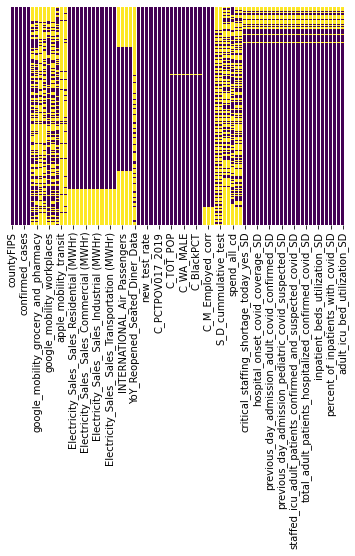

In [5]:
# missing_cols=df.isnull().sum()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [4]:
# missing_cols=df.isnull().sum()/len(df)
# missing_cols=missing_cols[missing_cols>0.5]
# missing_cols.sort_values(ascending=False,inplace=True)
# print(missing_cols)
# cols_to_remove=list(missing_cols.index)
# print(df[cols_to_remove].head())
# print(cols_to_remove)


apple_mobility_transit                   0.953895
apple_mobility_walking                   0.878855
YoY_Reopened_Seated_Diner_Data           0.859176
google_mobility_parks                    0.833033
google_mobility_transit_stations         0.729797
S_D_cummulative_test                     0.675605
S_D_dly_new_test                         0.675605
initclaims_rate_regular_cw               0.670357
initclaims_count_regular_cw              0.670357
revenue_all_cd                           0.657763
merchants_all_cd                         0.657763
google_mobility_residential              0.612872
google_mobility_grocery_and_pharmacy     0.565461
google_mobility_retail_and_recreation    0.519306
spend_all_cd                             0.510176
dtype: float64


In [14]:
print(df.shape)

(1179375, 82)


# Removing columns with more than 50% empty cells

In [5]:
df.drop(cols_to_remove,axis=1,inplace=True)
# print(df.head())
# x=df.isnull().sum()
# print(x)
# sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #heatmap to show missing values in df

print(df.head())


   countyFIPS  stateFIPS        date  confirmed_cases  deaths  \
0        1001          1  2020-01-22                0       0   
1        1003          1  2020-01-22                0       0   
2        1005          1  2020-01-22                0       0   
3        1007          1  2020-01-22                0       0   
4        1009          1  2020-01-22                0       0   

   google_mobility_workplaces  apple_mobility_driving  \
0                         NaN                  101.51   
1                         NaN                  103.12   
2                         NaN                  120.67   
3                         NaN                  111.18   
4                         NaN                   91.56   

   Electricity_Sales_ Revenue_Residential ($ x1000)  \
0                                        670692.302   
1                                        670692.302   
2                                        670692.302   
3                                        67069

## after removing 40% empty cols 

In [6]:
missing_cols=df.isnull().sum()/len(df)
missing_cols=missing_cols[missing_cols>0.4]
missing_cols.sort_values(ascending=False,inplace=True)
cols_to_remove=list(missing_cols.index)
# print(cols_to_remove)
df.drop(cols_to_remove,axis=1,inplace=True)
print(df.head())
# sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #heatmap to show missing values in df



   countyFIPS  stateFIPS        date  confirmed_cases  deaths  \
0        1001          1  2020-01-22                0       0   
1        1003          1  2020-01-22                0       0   
2        1005          1  2020-01-22                0       0   
3        1007          1  2020-01-22                0       0   
4        1009          1  2020-01-22                0       0   

   google_mobility_workplaces  apple_mobility_driving  \
0                         NaN                  101.51   
1                         NaN                  103.12   
2                         NaN                  120.67   
3                         NaN                  111.18   
4                         NaN                   91.56   

   Electricity_Sales_ Revenue_Residential ($ x1000)  \
0                                        670692.302   
1                                        670692.302   
2                                        670692.302   
3                                        67069

In [17]:
# missing_cols=df.isnull().sum()/len(df)
# missing_cols.sort_values(ascending=False,inplace=True)
# missing_cols=missing_cols[missing_cols>0.08]
# print(missing_cols)
# cols_to_check=list(missing_cols.index)
# print(df[cols_to_check].head(30))


apple_mobility_driving                                                    0.358606
google_mobility_workplaces                                                0.290587
Electricity_Sales_ Sales_Transportation (MWHr)                            0.162667
Electricity_Sales_ Sales_Commercial (MWHr)                                0.162667
Electricity_Sales_ Revenue_Residential ($ x1000)                          0.162667
Electricity_Sales_ Sales_Residential (MWHr)                               0.162667
Electricity_Sales_ Revenue_Commercial ($ x1000)                           0.162667
Electricity_Sales_ Customers_Count_Residential                            0.162667
Electricity_Sales_ Customers_Count_Commercial                             0.162667
Electricity_Sales_ Revenue_Industrial ($ x1000)                           0.162667
Electricity_Sales_ Sales_Industrial (MWHr)                                0.162667
Electricity_Sales_ Customers_Count_Industrial                             0.162667
Elec

In [7]:
print(df.shape)

(1179375, 63)


## columns having object and counting number of dots in them

In [17]:
# s = (df.dtypes == 'object')
# object_cols = list(s[s].index)
# print(object_cols)

# print(df['test_count'].head(20))
# # a= df['test_count'].str.find(".")
# print(a.head(50))
# print(df['test_count'][0])

# print(df['new_test_rate'].value_counts().head(30))
# df.to_csv('clean_set.csv')
# df['new_test_rate'].to_csv('clean_col1.csv')
# x=df['new_test_rate'].value_counts()
# x.to_csv('count_dots.csv')

['date', 'test_count', 'test_rate', 'new_test_rate', 'new_test_count']


In [18]:
print(df['test_rate'].value_counts().head(30))

.         128690
0           3593
4403        2114
2992        1216
6912        1150
75.6        1046
0.517        744
9541         569
22064        569
33028        546
144          540
100          522
38009        507
2114         474
5068         473
0.0698       469
951          468
11.8         464
33820        460
4433         438
17453        437
23940        435
410.0        426
301.0        419
37770        415
104          414
8962         413
538          413
10040        410
29011        410
Name: test_rate, dtype: int64


## Removing dot from object columns

In [8]:

for i in range(0,len(df['new_test_rate'])):
    if  df['new_test_rate'][i]==".":
        df['new_test_rate'][i]=0

for i in range(0,len(df['test_rate'])):
    if  df['test_rate'][i]==".":
        df['test_rate'][i]=0

for i in range(0,len(df['new_test_count'])):
    if  df['new_test_count'][i]==".":
        df['new_test_count'][i]=0

for i in range(0,len(df['test_count'])):
    if  df['test_count'][i]==".":
        df['test_count'][i]=0

# x1=df['test_rate'].value_counts()
# print(x1)
# x1.to_csv('count_dots6.csv')

# x2=df['new_test_count'].value_counts()
# x2.to_csv('count_dots7.csv')

# x3=df['test_count'].value_counts()
# x3.to_csv('count_dots8.csv')

# print(x)
# print(df['new_test_rate'].tail(20))

<ipython-input-8-249ff4beab7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_test_rate'][i]=0
<ipython-input-8-249ff4beab7e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['test_rate'][i]=0
<ipython-input-8-249ff4beab7e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_test_count'][i]=0
<ipython-input-8-249ff4beab7e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


## converting objects into float


In [9]:
## converting objects into float


df['test_rate']=df['test_rate'].astype(float)
df['new_test_count']=df['new_test_count'].astype(float)
df['test_count']=df['test_count'].astype(float)
df['new_test_rate']=df['new_test_rate'].astype(float)



# print(df.info())
# s = (df.dtypes == 'object')
# object_cols = list(s[s].index)
# print(object_cols)
# # df.dtypes.to_csv('data_type_col.csv')

# parsing dates


df['date']=pd.to_datetime(df['date'],format="%Y/%m/%d")
# df.date.dtype
df['date']=df['date'].map(dt.datetime.toordinal)
print(df.head())

# sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #heatmap to show missing values in df



   countyFIPS  stateFIPS    date  confirmed_cases  deaths  \
0        1001          1  737446                0       0   
1        1003          1  737446                0       0   
2        1005          1  737446                0       0   
3        1007          1  737446                0       0   
4        1009          1  737446                0       0   

   google_mobility_workplaces  apple_mobility_driving  \
0                         NaN                  101.51   
1                         NaN                  103.12   
2                         NaN                  120.67   
3                         NaN                  111.18   
4                         NaN                   91.56   

   Electricity_Sales_ Revenue_Residential ($ x1000)  \
0                                        670692.302   
1                                        670692.302   
2                                        670692.302   
3                                        670692.302   
4              

In [12]:
# print(df.shape)
df.to_csv('cleaned_final_covid_data.csv')

In [25]:
## importing covid file with removed columns,dots and parsed dates
# df = pd.read_csv('cleaned_final_covid_data.csv')
# df.drop(df.columns[[0]],axis=1,inplace=True)
# print(df.head())

   countyFIPS  stateFIPS    date  confirmed_cases  deaths  \
0        1001          1  737446                0       0   
1        1003          1  737446                0       0   
2        1005          1  737446                0       0   
3        1007          1  737446                0       0   
4        1009          1  737446                0       0   

   google_mobility_workplaces  apple_mobility_driving  \
0                         NaN                  101.51   
1                         NaN                  103.12   
2                         NaN                  120.67   
3                         NaN                  111.18   
4                         NaN                   91.56   

   Electricity_Sales_ Revenue_Residential ($ x1000)  \
0                                        670692.302   
1                                        670692.302   
2                                        670692.302   
3                                        670692.302   
4              

## splitting dataset for random forest regression

In [26]:
##splitting dataset

y=df['confirmed_cases']

predictors= df.drop(['confirmed_cases','countyFIPS','stateFIPS'], axis=1)

# print(y.head())
# print(predictors.head())

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(predictors, y, train_size=0.8, test_size=0.2,random_state=0)

# print(X_train.head())

## with death removed

In [32]:
# print(df.info())
#parsing dates


# df['date']=pd.to_datetime(df['date'],format="%Y/%m/%d")
# # df.date.dtype
# df['date']=df['date'].map(dt.datetime.toordinal)
# print(df.head())


   countyFIPS  stateFIPS    date  confirmed_cases  deaths  \
0        1001          1  737446                0       0   
1        1003          1  737446                0       0   
2        1005          1  737446                0       0   
3        1007          1  737446                0       0   
4        1009          1  737446                0       0   

   google_mobility_workplaces  apple_mobility_driving  \
0                         NaN                  101.51   
1                         NaN                  103.12   
2                         NaN                  120.67   
3                         NaN                  111.18   
4                         NaN                   91.56   

   Electricity_Sales_ Revenue_Residential ($ x1000)  \
0                                        670692.302   
1                                        670692.302   
2                                        670692.302   
3                                        670692.302   
4              

In [36]:
# y=df['confirmed_cases']

# predictors= df.drop(['confirmed_cases','countyFIPS','stateFIPS','deaths'], axis=1)

# print(y.head())
# print(X_train.head())
# print(predictors.head())

# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(predictors, y, train_size=0.8, test_size=0.2,random_state=0)

           date  google_mobility_workplaces  apple_mobility_driving  \
877970   737725                       -15.0                  138.71   
807190   737702                       -12.0                  108.60   
81733    737471                        -1.0                  121.86   
1155211  737813                         5.0                  157.32   
98094    737477                         NaN                  149.47   

         Electricity_Sales_ Revenue_Residential ($ x1000)  \
877970                                         965189.172   
807190                                         904464.076   
81733                                          532860.718   
1155211                                               NaN   
98094                                          934825.546   

         Electricity_Sales_ Sales_Residential (MWHr)  \
877970                                   8022464.584   
807190                                   6953491.100   
81733                                 

In [27]:
# # c=X_train.columns
# c=list(c)
# c= pd.DataFrame(c)
print(c.head())
# c.to_csv('cols_in_training.csv')

                                                  0
0                                              date
1                                            deaths
2                        google_mobility_workplaces
3                            apple_mobility_driving
4  Electricity_Sales_ Revenue_Residential ($ x1000)


## Imputation for rfr

In [27]:
## Imputation

from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

# print(imputed_X_valid.head())
# print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

## imputation for rfr without deaths

In [37]:
## Imputation

from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

# print(imputed_X_valid.head())
# print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

In [28]:
print(imputed_X_valid.isnull().sum())

date                                                                      0
deaths                                                                    0
google_mobility_workplaces                                                0
apple_mobility_driving                                                    0
Electricity_Sales_ Revenue_Residential ($ x1000)                          0
Electricity_Sales_ Sales_Residential (MWHr)                               0
Electricity_Sales_ Customers_Count_Residential                            0
Electricity_Sales_ Revenue_Commercial ($ x1000)                           0
Electricity_Sales_ Sales_Commercial (MWHr)                                0
Electricity_Sales_ Customers_Count_Commercial                             0
Electricity_Sales_ Revenue_Industrial ($ x1000)                           0
Electricity_Sales_ Sales_Industrial (MWHr)                                0
Electricity_Sales_ Customers_Count_Industrial                             0
Electricity_

In [46]:
print(len(y_valid))

235875


NameError: name 'power' is not defined

# Important functions

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math


# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    r2_e= model.score(X_valid, y_valid)
    mse=mean_squared_error(y_valid, preds)
    rmse=math.sqrt(mse)
    return mean_absolute_error(y_valid, preds), r2_e, mse, rmse

## Checking score


In [30]:
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))



(42.379080021197666, 0.9994578374129979, 75463.52424483307, 274.7062508295599)


In [40]:
## without death
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

(43.6165312135665, 0.9958565712728376, 576723.1854524218, 759.4229292379983)


       date  google_mobility_workplaces  apple_mobility_driving  \
0  737725.0                  -15.000000                  138.71   
1  737702.0                  -12.000000                  108.60   
2  737471.0                   -1.000000                  121.86   
3  737813.0                    5.000000                  157.32   
4  737477.0                  -23.159065                  149.47   

   Electricity_Sales_ Revenue_Residential ($ x1000)  \
0                                     965189.172000   
1                                     904464.076000   
2                                     532860.718000   
3                                     898020.548639   
4                                     934825.546000   

   Electricity_Sales_ Sales_Residential (MWHr)  \
0                                 8.022465e+06   
1                                 6.953491e+06   
2                                 3.622285e+06   
3                                 7.118095e+06   
4               

In [42]:
df2 = pd.read_csv('valid_covid.csv')

In [49]:
# print(df2.head())
# print(df2.isnull().sum())
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error
# import math

# model = RandomForestRegressor(n_estimators=10, random_state=0)
# model.fit(imputed_X_train, y_train)
# preds = model.predict(df2)
# Prediction=list(preds)
# d= pd.DataFrame(Prediction)
# print(d.head())
d.to_csv('prediction_on_valid_covid.csv')


## Training the Multiple Linear Regression model on the Training set

In [35]:


# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(imputed_X_train, y_train)
# pred = regressor.predict(imputed_X_valid)

# r2_e= regressor.score(imputed_X_valid, y_valid)
# mse=mean_squared_error(y_valid, pred)
# rmse=math.sqrt(mse)
# mae=mean_absolute_error(y_valid, pred)
# print(r2_e,mse,rmse,mae)




0.7839184784402472 30076352.614538483 5484.191154084482 1630.3976139448616


In [62]:
# l=regressor.coef_
print(l)
# cols=imputed_X_valid.columns
# l=list(l)
# mlr=pd.DataFrame(l,index=cols)
# print(mlr.head())
# mlr.to_csv('mlr_coeff.csv')

[6.163755119897619, 27.166357912785934, -5.919733254594213, -0.005882651836657076, -0.005318512757373926, 0.0006924269374074311, 0.0002094586631327562, -0.0005046999104542736, 1.4866328925463787e-05, -0.0013628210341554148, 0.011214961924722516, -0.0006376731957429271, 0.001255226173421664, -0.021502926954655888, 0.009633290638423109, -240.3648269404761, -9.394973040954824e-05, 0.03180622960615098, -4.556005776375583, 0.02687868864189863, -82.66733408010805, 12.901760266375875, -30.7697275930974, -0.03678615953407478, -0.015751455185597785, -0.12866345010740848, 0.11257178067810694, 0.8054964037384198, -0.6530013478678438, 3290.662828428427, -388.32451538158205, -4715.456673917691, -0.16958693824949228, 0.13481836586655438, 14.254466091307345, -49.42222528197111, 47.194027074743126, -0.019958371867088775, -4.156280215795021, 0.09894673327771052, 7.249158421098713, 1.003955969925934, -1.7622009464296853, -6.228670397997752, -5.761281044536516, 1.422964149545838, -8.764698546393122, -3.3

In [ ]:
# residual plot










## Saving Model using pickle

In [29]:
# from sklearn.metrics import max_error
# model = RandomForestRegressor(n_estimators=10, random_state=0)
# model.fit(imputed_X_train, y_train)


# import pickle

# saved_model = pickle.dumps(model)
 
# # Load the pickled model
# rfr_from_pickle = pickle.loads(saved_model)
 
# # Use the loaded pickled model to make predictions
# rfr_from_pickle.predict(imputed_X_valid)

# print(rfr_from_pickle)


# model.score(imputed_X_valid,y_valid)
# preds= rfr_from_pickle.predict(imputed_X_valid)
# print(preds)

# r2_e= rfr_from_pickle.score(imputed_X_valid, y_valid)
# mse=mean_squared_error(y_valid, preds)
# rmse=math.sqrt(mse)
# mae=mean_absolute_error(y_valid, preds)
# print(r2_e,mse,rmse,mae)


0.9994578374129979 75463.52424483307 274.7062508295599 42.379080021197666


In [32]:
# preds=rfr_from_pickle.predict(imputed_X_valid)

# Prediction=list(preds)
# d= pd.DataFrame(Prediction)
# print(d.head())
# print(y_valid.head())

        0
0     0.0
1  2819.1
2    27.8
3     2.8
4    29.2
73900         0
1055826    2729
460557       25
203635        2
380485       28
Name: confirmed_cases, dtype: int64


## getting percentage accuracy

In [47]:
from sklearn.metrics import max_error
model = RandomForestRegressor(n_estimators=10, random_state=0)
model.fit(imputed_X_train, y_train)
# preds = model.predict(imputed_X_valid)
# model.score(imputed_X_valid,y_valid)


0.9994578374129979

In [58]:
print(preds.head())

AttributeError: 'numpy.ndarray' object has no attribute 'head'

## Getting CSV of results

In [139]:
# print(preds)
# print(y_valid)
# Prediction=list(preds)
# d= pd.DataFrame(Prediction)
# print(d.head())
# e=y_valid
# print(e.head())

d.to_csv('prediction.csv')
e.to_csv('real.csv')
# print(y_valid.dtype)
